##1. Configuración del ambiente

- Para empezar, puedes utilizar un entorno virtual como Google Colaboratory, o si deseas, puedes usar el editor Python de tu preferencia, sólo asegúrate de tener Python 3.x instalado en tu computadora.

- En el proyecto usaremos 5 variables que serán manipuladas dentro de varias funciones, estas variables son conocidas como variables **globales**, es necesario que las definas aquí de la siguiente forma:

```
global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
```
---

- También necesitarás instalar algunas librerías de Python que son esenciales para este proyecto, como ```Pandas, Numpy, Matplotlib```, etc.

- Para estar seguros de que tenemos todo listo en nuestro Ambiente, podemos ejecutar las siguientes líneas de código:

```
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Numpy | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'
```
---

- El resultado debería ser las bibliotecas y sus versiones que tenemos instaladas en nuestro Ambiente, si tienes algún error revisa tu configuración, talvez falte instalar alguna biblioteca.


In [1]:
global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

In [2]:
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Numpy | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'

Python 3.10.11
------
Name: pandas
Version: 1.5.3
------
Name: numpy
Version: 1.22.4
------
Name: matplotlib
Version: 3.7.1


##2. Obtención de datos

Crea una funcion ```importar_base_bitcoin()```, dentro de ella, define nuevamente las variables ```globales```(ver Paso1) y escribe tu código:

1.  Utiliza la biblioteca ```yfinance``` de Python para extraer el histórico de precios del Bitcoin en dólares BTC-USD, deberás extraer el histórico de los últimos 7 días en intervalos de 5 minutos, este histórico deberás guardarlo en el dataframe ```df_bitcoin```.
---

Crea una funcion ```extraer_tendencias()```, dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

2.  Utilizando la biblioteca ```BeautifulSoup``` deberás realizar Web Scraping de la página https://coinmarketcap.com/ para extraer el precio actual del Bitcoin BTC en dólares USD y la variación de su precio en la última hora 1h % . El precio deberás convertirlo a float y guardarlo en la variable llamada ```precio_actual```. Ahora, en la variable ```tendencia``` guarda el valor de 'baja'si la variación del precio es negativa, sino, guarda el valor de 'alta'.
---

**Apoyo**

*   Puedes encontrar más información de como instalar y usar la biblioteca yfinance en su página oficial: [yfinance](https://pypi.org/project/yfinance/)

*  Además de los recursos mencionados en el card ‘Para saber más’ del Trello, puedes encontrar información complementar de Web Scraping en el siguiente enlace: [Web Scraping](https://www.youtube.com/watch?v=IKlwNKG2dus&t=972s)
.

In [3]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup

def importar_base_bitcoin():
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision
    
    # Extraer el histórico de precios del Bitcoin
    data = yf.download('BTC-USD', period='7d', interval='5m')
    df_bitcoin = data.copy()

def extraer_tendencias():
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision
    
    # Realizar Web Scraping de la página de CoinMarketCap
    url = 'https://coinmarketcap.com/'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extraer el precio actual del Bitcoin en dólares USD
    precio = soup.find(class_='sc-cadad039-0 clgqXO').text
    precio = precio.replace('$', '').replace(',', '') # eliminar comas de los miles
    precio_actual = float(precio)

    # Extraer la variación del precio en la última hora
    variacion = soup.find(class_='sc-97d6d2ca-0 bQjSqS').text
    variacion = variacion.replace('%', '')
    variacion = float(variacion)
    tendencia = 'baja' if variacion < 0 else 'alta'

In [4]:
# Definir las variables globales fuera de las funciones
df_bitcoin = None
precio_actual = None
tendencia = None
media_bitcoin = None
algoritmo_decision = None

# Llamar a la función para importar la base de datos
importar_base_bitcoin()

# Llamar a la función para extraer las tendencias
extraer_tendencias()

# Utilizar las variables globales
print(df_bitcoin.head())
print(precio_actual)
print(tendencia)

[*********************100%***********************]  1 of 1 completed
                                   Open          High           Low  \
Datetime                                                              
2023-05-05 00:00:00+00:00  28851.480469  28857.996094  28851.480469   
2023-05-05 00:05:00+00:00  28856.685547  28864.818359  28852.958984   
2023-05-05 00:10:00+00:00  28865.503906  28866.818359  28862.308594   
2023-05-05 00:15:00+00:00  28864.750000  28864.750000  28845.509766   
2023-05-05 00:20:00+00:00  28872.742188  28872.742188  28857.976562   

                                  Close     Adj Close  Volume  
Datetime                                                       
2023-05-05 00:00:00+00:00  28855.175781  28855.175781       0  
2023-05-05 00:05:00+00:00  28864.818359  28864.818359       0  
2023-05-05 00:10:00+00:00  28864.892578  28864.892578       0  
2023-05-05 00:15:00+00:00  28848.173828  28848.173828       0  
2023-05-05 00:20:00+00:00  28859.775391  28859.77

##3. Limpieza de datos

Crea una funcion ```limpieza_datos()```, dentro de ella, define nuevamente las variables ```globales```(ver Paso1) y escribe tu código:

Antes de limpiar la base, crea una copia de la base ```df_bitcoin``` para que realices la limpieza en esta nueva ```base(df_bitcoin_limpio)```, sin modificar la base original, además es importante entender su contenido:



*   **Datetime:** Es el índice del dataframe, y contiene la fecha y hora del intervalo seleccionado, no puede estar duplicado.

*   **Open:** Contiene el precio del Bitcoin al inicio del intervalo.

*   **High:** Contiene el precio más alto del Bitcoin durante el intervalo.

*   **Low:** Contiene el precio más bajo del Bitcoin durante el intervalo.

*   **Close:** Contiene el precio del Bitcoin al final del intervalo.

*   **Volume:** Contiene el total de transacciones hechas durante el intervalo.

---

Para la limpieza utilizaremos los atributos ```Datetime, Close y Volume```.



1.   Analiza la base ```df_bitcoin_limpio```, identifica duplicados en el índice y trátalos para quedarte con sólo índices únicos.
2.   Luego busca por valores nulos en la columna ```Close``` y trátalos.
3.   Verifica que todos los registros de la base tengan un ```Volume``` de transacción mayor a 0, caso contrário, elimínalos.
4.   Deberás identificar y eliminar los ```outliers``` en el precio del Bitcoin, columna ```Close```, utiliza un gráfico de ```boxplot``` para identificarlos.
5.   Filtra o selecciona únicamente los registros cuyo ```precio(Close)``` se encuentren entre el ```1er cuartil(Q1) y el 3er cuartil(Q3) del boxplot```.
6.   Finalmente, calcula el ```precio promedio(Close)``` de esta selección y guárdala en la variable ```media_bitcoin```.


In [5]:
import pandas as pd
import seaborn as sns

def limpieza_datos():
    global df_bitcoin, precio_actual, tendencia, df_bitcoin_limpio, media_bitcoin
    
    # Crear una copia de la base de datos original
    df_bitcoin_limpio = df_bitcoin.copy()

    # Eliminar filas duplicadas del índice
    df_bitcoin_limpio = df_bitcoin_limpio[~df_bitcoin_limpio.index.duplicated(keep='first')]

    # Eliminar filas con valores faltantes en la columna Close
    df_bitcoin_limpio = df_bitcoin_limpio.dropna(subset=['Close'])

    # Eliminar filas con Volume menor o igual a 0
    df_bitcoin_limpio = df_bitcoin_limpio[df_bitcoin_limpio['Volume'] > 0]

    # Identificar y eliminar outliers en la columna Close
    q1, q3 = df_bitcoin_limpio['Close'].quantile([0.25, 0.75])
    iqr = q3 - q1
    umbral_inf = q1 - 1.5 * iqr
    umbral_sup = q3 + 1.5 * iqr
    df_bitcoin_limpio = df_bitcoin_limpio[(df_bitcoin_limpio['Close'] >= umbral_inf) & (df_bitcoin_limpio['Close'] <= umbral_sup)]

    # Calcular el precio promedio de la selección
    media_bitcoin = df_bitcoin_limpio['Close'].mean()

    # Crear un boxplot para visualizar los outliers identificados
    sns.boxplot(x=df_bitcoin_limpio['Close'])

[*********************100%***********************]  1 of 1 completed
                                   Open          High           Low  \
Datetime                                                              
2023-05-05 00:30:00+00:00  28891.312500  28912.441406  28891.312500   
2023-05-05 00:35:00+00:00  28916.875000  28925.369141  28913.117188   
2023-05-05 00:40:00+00:00  28937.607422  28940.392578  28923.916016   
2023-05-05 00:55:00+00:00  28956.919922  28968.748047  28945.613281   
2023-05-05 01:05:00+00:00  28933.779297  28934.070312  28920.660156   

                                  Close     Adj Close    Volume  
Datetime                                                         
2023-05-05 00:30:00+00:00  28912.441406  28912.441406   3324928  
2023-05-05 00:35:00+00:00  28913.117188  28913.117188   6749184  
2023-05-05 00:40:00+00:00  28924.064453  28924.064453  34026496  
2023-05-05 00:55:00+00:00  28945.613281  28945.613281  23319552  
2023-05-05 01:05:00+00:00  28920.6601

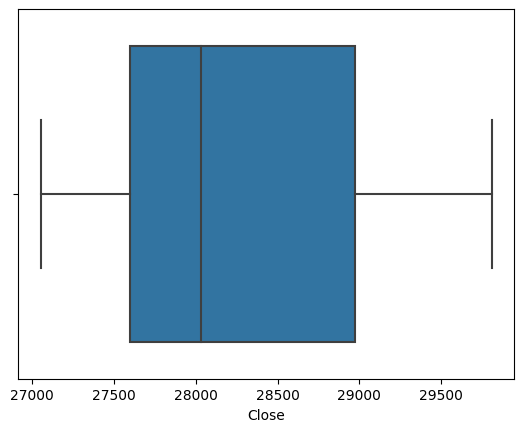

In [6]:
# Definir las variables globales fuera de la función
df_bitcoin = None
precio_actual = None
tendencia = None
df_bitcoin_limpio = None
media_bitcoin = None

# Llamar a la función para importar la base de datos
importar_base_bitcoin()

# Llamar a la función para limpiar la base de datos
limpieza_datos()

# Utilizar las variables globales
print(df_bitcoin_limpio.head())
print(media_bitcoin)

##4. Tomar decisiones

Llegó el momento de construir tu algoritmo de decisión:

Crea una funcion ```tomar_decisiones()```, dentro de ella, define nuevamente las variables ```globales```(ver Paso1) y escribe tu código:


> Rellena la variable ```algoritmo_decision``` con el valor resultante del siguiente criterio de decisión:

1.   Si el precio actual es mayor/igual que el precio ```promedio``` y la ```tendencia``` es de baja, entonces guarda el ```valor ‘Vender’```.
1.   Si el precio actual es menor que el precio ```promedio``` y la ```tendencia``` es de alta, entonces guarda el ```valor ‘Comprar’```.
1.   Si ninguna de las 2 condiciones anteriores se cumple, entonces guarda el ```valor ''```.


---

**Extra**

Este es un algoritmo de decisión simple que ayuda a los clientes inexpertos a conocer el mejor momento de comprar o vender Bitcoin, ¿crees que existan otros indicadores en la base o en el site de noticias o algún criterio de decisión adicional que ayudaría a reforzar el algoritmo de decisión? Te invito a descubrir otras alternativas.

In [7]:
def tomar_decisiones():
    global df_bitcoin, precio_actual, tendencia, df_bitcoin_limpio, media_bitcoin, algoritmo_decision

    if precio_actual >= media_bitcoin and tendencia == 'baja':
        algoritmo_decision = 'Vender'
    elif precio_actual < media_bitcoin and tendencia == 'alta':
        algoritmo_decision = 'Comprar'
    else:
        algoritmo_decision = ''

[*********************100%***********************]  1 of 1 completed
Comprar


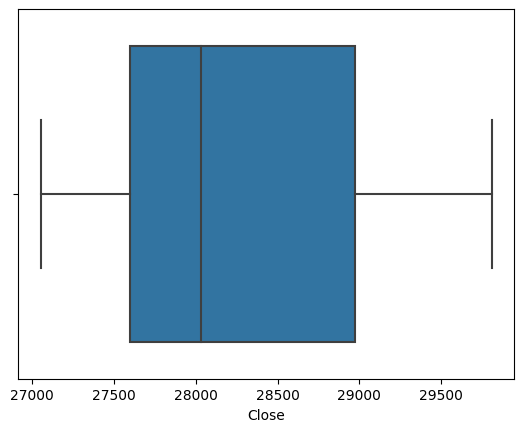

In [8]:
# Definir las variables globales fuera de la función
df_bitcoin = None
precio_actual = None
tendencia = None
df_bitcoin_limpio = None
media_bitcoin = None
algoritmo_decision = None

# Llamar a la función para importar la base de datos
importar_base_bitcoin()

# Llamar a la función para limpiar la base de datos
limpieza_datos()

# Llamar a la función para extraer las tendencias
extraer_tendencias()

# Llamar a la función para tomar decisiones
tomar_decisiones()

# Utilizar las variables globales
print(algoritmo_decision)

##5. Visualización

Crea una funcion ```visualizacion()```, dentro de ella, define nuevamente las variables ```globales```(ver Paso1) y escribe tu código:


1.   Adiciona una nueva columna ```(Promedio)``` al dataframe original ```df_bitcoiny``` almacena el valor de nuestra variable ```media_bitcoin```.
2.   Configura el tamaño del gráfico en una proporción de 16x5.
3.   Adiciona un título al gráfico.
4.   Usando el método ```plot()``` dibuja una línea en el gráfico, con los datos del índice y la columna ```Close``` de la base ```df_bitcoin```.
5.   Usando el método ```plot()``` dibuja una línea en el gráfico, con los datos del índice y la columna ```Promedio``` de la base ```df_bitcoin```.
6.   Usando el método ```annotate()``` muestra un mensaje dentro del gráfico con la decisión calculada del ```algoritmo```.
7.   Finalmente, usando el método ```show()``` muestra en pantalla el gráfico que acabamos de configurar.


---

**Apoyo**

Puedes encontrar más información sobre la biblioteca ```matplotlib``` en su página oficial:[matplotlib.pyplot](https://matplotlib.org/stable/api/pyplot_summary.html) 


In [9]:
import matplotlib.pyplot as plt

def visualizacion():
    global df_bitcoin, precio_actual, tendencia, df_bitcoin_limpio, media_bitcoin, algoritmo_decision
    
    # Adicionar una nueva columna al dataframe original
    df_bitcoin['Promedio'] = media_bitcoin

    # Configurar el tamaño del gráfico y añadir un título
    plt.figure(figsize=(16, 5))
    plt.title('Histórico de precios del Bitcoin')

    # Dibujar una línea con los datos de la columna Close
    df_bitcoin['Close'].plot()

    # Dibujar una línea con los datos de la columna Promedio
    df_bitcoin['Promedio'].plot()

    # Mostrar un mensaje dentro del gráfico con la decisión calculada del algoritmo
    plt.annotate(algoritmo_decision, xy=(df_bitcoin.index[-1], df_bitcoin['Close'][-1]), xytext=(df_bitcoin.index[-1] - pd.DateOffset(hours=2), df_bitcoin['Close'][-1] - 500), fontsize=14, arrowprops=dict(facecolor='red', shrink=0.05))

    # Mostrar el gráfico en pantalla
    plt.show()

[*********************100%***********************]  1 of 1 completed


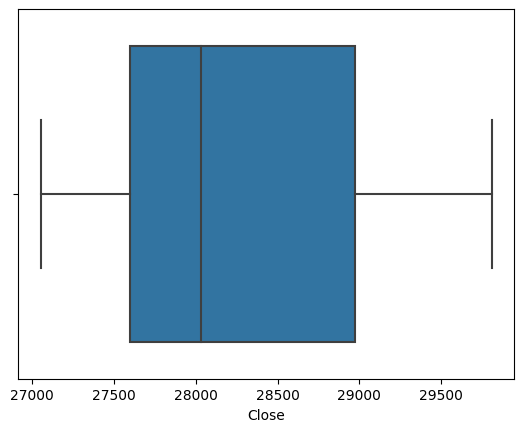

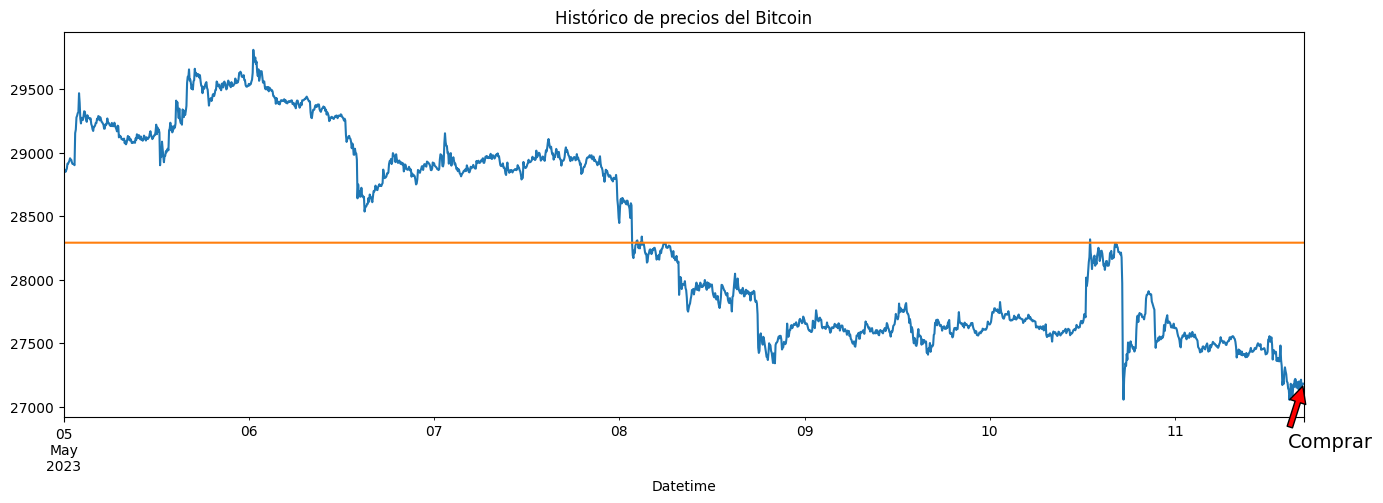

In [10]:
# Definir las variables globales fuera de la función
df_bitcoin = None
precio_actual = None
tendencia = None
df_bitcoin_limpio = None
media_bitcoin = None
algoritmo_decision = None

# Llamar a la función para importar la base de datos
importar_base_bitcoin()

# Llamar a la función para limpiar la base de datos
limpieza_datos()

# Llamar a la función para extraer las tendencias
extraer_tendencias()

# Llamar a la función para tomar decisiones
tomar_decisiones()

# Llamar a la función para visualizar los datos
visualizacion()

##6. Automatización

El trabajo de un Data Scientist sólo termina cuando la solución al problema está automatizada, esto permite soluciones automáticas para nuevos lotes de información.

*   Importa el método ```'clear_output()'```, este método nos permite borrar los resultados de la pantalla antes de imprimir un nuevo gráfico, y así evitar tener más de un gráfico en la pantalla, impórtalo de la siguiente forma: ```from IPython.display import clear_output```.
*   Importa también la biblioteca ```‘time’``` de la siguiente forma: ```import time```, utilizaremos su método ```time.sleep(300)``` para interrumpir la ejecución del código cada 300 segundos o 5 minutos.
*   Finalmente construiremos un loop infinito para ejecutar permanentemente y en intervalos de 5minutos, las funciones que hemos construído en los pasos 2 al 5 de nuestro proyecto, de la siguiente forma:

```
while(True):
  clear_output()
  importar_base_bitcoin()
  extraer_tendencias()
  limpieza_datos()
  tomar_decisiones()
  visualizacion()
  time.sleep(300)
```

El resultado de este código será un gráfico mostrando el histórico de precios del Bitcoin y la decisión del algoritmo en tiempo real, basado en datos normalizados y limpios, que se actualizarán cada 5 minutos.

---

**Conclusión**

Este desafío sólo fue una demonstración de un proyecto real, donde vemos el poder de los datos para la toma de decisiones y la importancia que tiene el tratamiento de los datos para evitar tomar decisiones equivocadas, durante este Bootcamp aprenderás nuevas herramientas y habilidades que te llevarán a ti y a este proyecto a un nuevo nivel.

---

¡Ahora, tu misión, si decides aceptarla, es, superar este Robot! ¡Suerte!

[*********************100%***********************]  1 of 1 completed


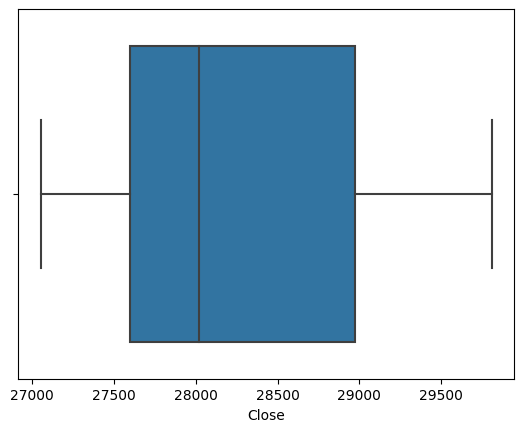

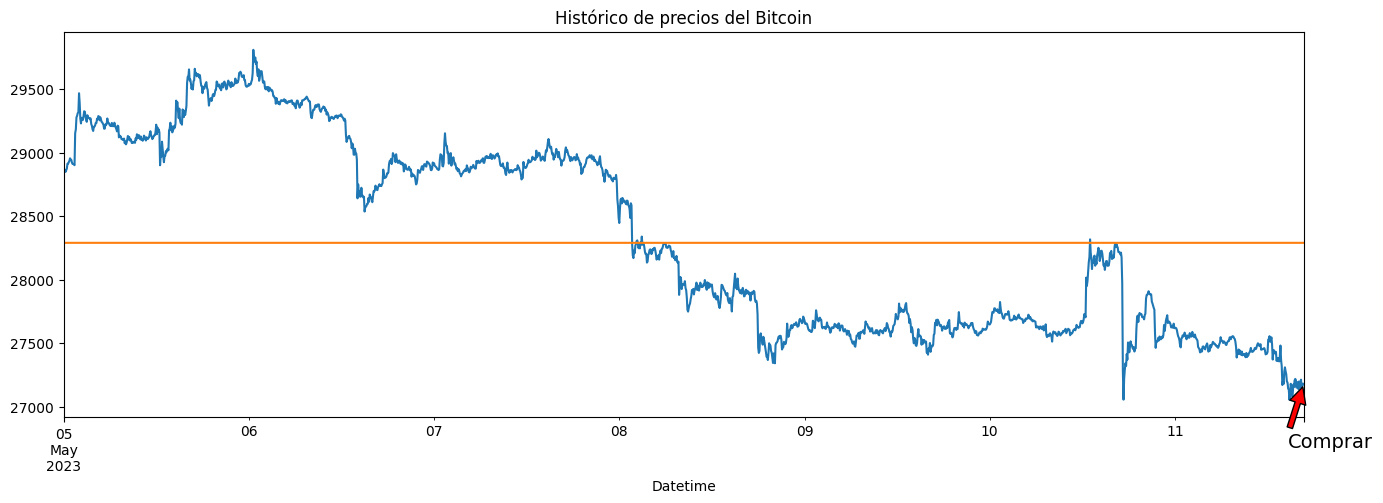

KeyboardInterrupt: ignored

In [12]:
from IPython.display import clear_output
import time

while True:
    clear_output()
    importar_base_bitcoin()
    extraer_tendencias()
    limpieza_datos()
    tomar_decisiones()
    visualizacion()
    time.sleep(300)

In [13]:
!pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
